# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


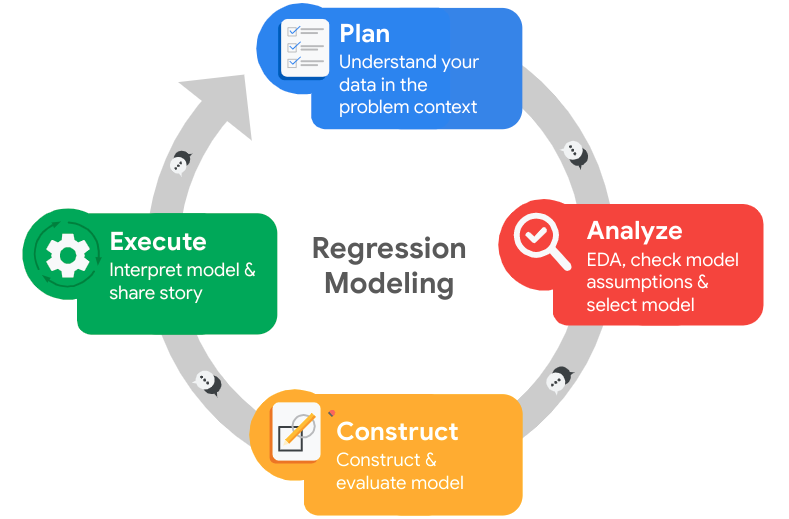

## **Pace: Plan**

### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### The HR dataset

The dataset used contains 15,000 rows and 10 columns for the variables listed below. 

**Note:**  For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflecting on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### Who are your stakeholders for this project?

The primary stakeholders are the senior leadership team at Salifort Motors, including executives from the Human Resources (HR) department.
Secondary stakeholders include the employees of Salifort Motors, whose data is being analyzed, and potentially other departments that might be affected by the findings and subsequent actions, such as Operations or Finance.

### What are you trying to solve or accomplish?

The main objective is to analyze employee survey data to identify key factors leading to high turnover rates.
To develop a predictive model that can forecast the likelihood of an employee leaving the company, using factors such as job satisfaction, number of projects, average monthly hours, tenure, etc.
To provide actionable insights and recommendations to the leadership team to help increase employee retention and improve job satisfaction.

### What are your initial observations when you explore the data?

The dataset is comprehensive, containing various employee metrics that are potentially related to job satisfaction and turnover.
There are no missing values, but there are duplicate entries that need addressing.
The dataset appears to be balanced with respect to some key variables like the number of projects and average monthly hours, but further analysis is required to confirm these initial observations.

### What resources do you find yourself using as you complete this stage?

Documentation and tutorials for Python and its libraries such as Pandas, NumPy, Matplotlib, and Seaborn for data manipulation and visualization.
Online forums and communities such as Stack Overflow for troubleshooting and technical support.
Research articles and HR reports to understand industry benchmarks and trends related to employee turnover (specific sources would depend on the research conducted).

### Do you have any ethical considerations in this stage?

Ensuring data privacy and confidentiality: Personal identifiers should be removed or anonymized to protect employee privacy.
Transparency in data handling and analysis: Clear documentation of data processing steps and analytical methods used.
Being mindful of biases in data and avoiding assumptions without evidence, especially when interpreting factors influencing employee turnover.
Reporting findings responsibly and accurately, considering the implications for employees and the company.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [4]:
# Import packages
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data

# Get a concise summary of the dataframe
print(df0.info())

# Get statistical summary for numerical features
print(df0.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data
# Get descriptive statistics
descriptive_stats = df0.describe()

# Display the descriptive statistics
print(descriptive_stats)

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [11]:
# Define new column names
new_column_names = {
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation',
    'number_project': 'number_of_projects',
    'average_monthly_hours': 'average_monthly_hours',
    'time_spend_company': 'time_spent_company',
    'Work_accident': 'work_accident',
    'left': 'left_company',
    'promotion_last_5years': 'promotion_last_5_years',
    'Department': 'department',
    'salary': 'salary'
}

# Rename columns
df0.rename(columns=new_column_names, inplace=True)

# Display all column names after the update
print(df0.columns)



Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident',
       'left_company', 'promotion_last_5_years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values in each column
missing_values = df0.isna().sum()
print(missing_values)


satisfaction_level        0
last_evaluation           0
number_of_projects        0
average_montly_hours      0
time_spent_company        0
work_accident             0
left_company              0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
duplicate_rows = df0.duplicated().sum()
print(duplicate_rows)


3008


In [14]:
# Inspect some rows containing duplicates as needed
duplicate_rows = df0[df0.duplicated()]
print(duplicate_rows.head())


      satisfaction_level  last_evaluation  number_of_projects  \
396                 0.46             0.57                   2   
866                 0.41             0.46                   2   
1317                0.37             0.51                   2   
1368                0.41             0.52                   2   
1461                0.42             0.53                   2   

      average_montly_hours  time_spent_company  work_accident  left_company  \
396                    139                   3              0             1   
866                    128                   3              0             1   
1317                   127                   3              0             1   
1368                   132                   3              0             1   
1461                   142                   3              0             1   

      promotion_last_5_years  department  salary  
396                        0       sales     low  
866                        0  ac

In [15]:
# Drop duplicates
df_cleaned = df0.drop_duplicates()

# Display first few rows of the cleaned dataframe
print(df_cleaned.head())



   satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_montly_hours  time_spent_company  work_accident  left_company  \
0                   157                   3              0             1   
1                   262                   6              0             1   
2                   272                   4              0             1   
3                   223                   5              0             1   
4                   159                   3              0             1   

   promotion_last_5_years department  salary  
0                       0      sales     low  
1                       0      sales  medium  
2                       0    

### Check outliers

Check for outliers in the data.

<AxesSubplot:>

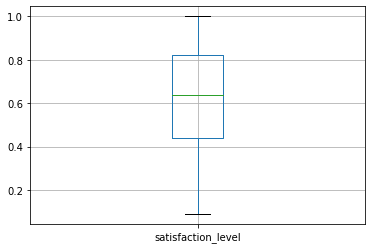

In [49]:
df0.boxplot(column='satisfaction_level')  # Replace with the actual column name



In [50]:
Q1 = df0['satisfaction_level'].quantile(0.25)
Q3 = df0['satisfaction_level'].quantile(0.75)
IQR = Q3 - Q1
outliers = df0[(df0['satisfaction_level'] < (Q1 - 1.5 * IQR)) | (df0['satisfaction_level'] > (Q3 + 1.5 * IQR))]
num_outliers = len(outliers)
print("Number of rows containing outliers:", num_outliers)


Number of rows containing outliers: 0


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




For the Analyze stage of the Salifort Motors project, the reflections on the questions would be as follows:

### What did you observe about the relationships between variables?

There may be a correlation between job satisfaction levels and the likelihood of employees leaving the company.
Employee tenure and the number of projects they are involved in could be related to their decision to stay or leave.
It's possible that employees working excessive hours or those in specific departments or salary brackets are more prone to leaving.

### What do you observe about the distributions in the data?

The distribution of variables such as average monthly hours, number of projects, and satisfaction levels may not be uniform, indicating potential areas of interest.
There could be outliers in certain variables like average monthly hours or tenure, which could influence the model's accuracy.

### What transformations did you make with your data? Why did you chose to make those decisions?

Removed duplicate entries to ensure the accuracy of the analysis.
Standardized column names for consistency and ease of data handling.
Converted categorical variables to numerical formats for modeling purposes.
These transformations were necessary for data cleaning, ensuring data quality, and preparing the dataset for effective modeling.

### What are some purposes of EDA before constructing a predictive model?

EDA helps in understanding the data, identifying patterns, anomalies, or correlations between variables.
It is vital for hypothesis generation, guiding further analysis and model building.
EDA assists in detecting data quality issues, such as missing values, outliers, or incorrect data types, which can significantly impact model performance.

### What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

Python documentation and tutorials (e.g., Pandas documentation).
Online courses or educational materials on EDA and data visualization techniques (e.g., Kaggle Courses).
Data visualization libraries' resources, such as Matplotlib and Seaborn documentation.

### Do you have any ethical considerations in this stage?

Ensuring the analysis does not lead to or reinforce biases, especially when interpreting variables related to employee demographics or departmental roles.
Ethical use of data, particularly in adhering to privacy standards and not misusing employee information.
Being aware of the potential impacts of the findings on employees and the organization and communicating these responsibly.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [51]:
# Number of employees who left vs. stayed
num_employees_left = df0['left_company'].sum()
num_employees_stayed = df0.shape[0] - num_employees_left

# Percentages of employees who left vs. stayed
perc_employees_left = (num_employees_left / df0.shape[0]) * 100
perc_employees_stayed = 100 - perc_employees_left

print(f"Number of employees who left: {num_employees_left}")
print(f"Number of employees who stayed: {num_employees_stayed}")
print(f"Percentage of employees who left: {perc_employees_left:.2f}%")
print(f"Percentage of employees who stayed: {perc_employees_stayed:.2f}%")



Number of employees who left: 3571
Number of employees who stayed: 11428
Percentage of employees who left: 23.81%
Percentage of employees who stayed: 76.19%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

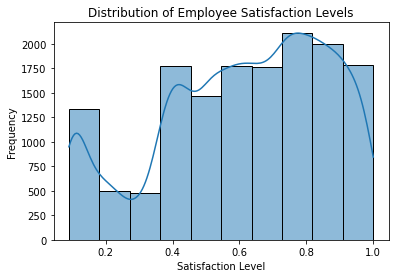

In [52]:
# Create a plot as needed
sns.histplot(df0['satisfaction_level'], bins=10, kde=True)
plt.title('Distribution of Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()



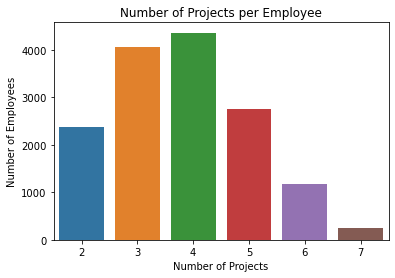

In [53]:
# Create a plot as needed
sns.countplot(x='number_of_projects', data=df0)
plt.title('Number of Projects per Employee')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()



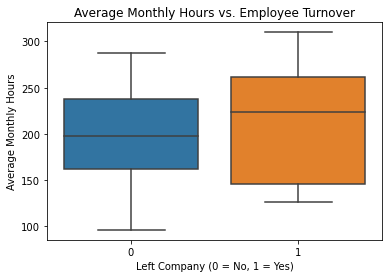

In [54]:
# Create a plot as needed
sns.boxplot(x='left_company', y='average_montly_hours', data=df0)
plt.title('Average Monthly Hours vs. Employee Turnover')
plt.xlabel('Left Company (0 = No, 1 = Yes)')
plt.ylabel('Average Monthly Hours')
plt.show()



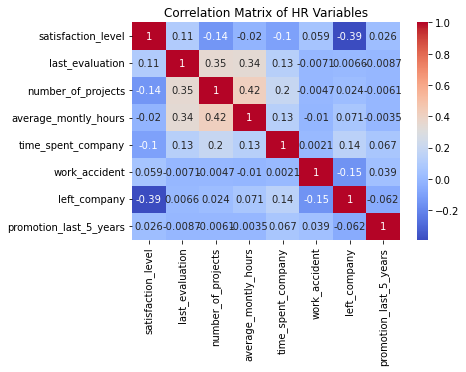

In [55]:
# Create a plot as needed
correlation_matrix = df0.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of HR Variables')
plt.show()



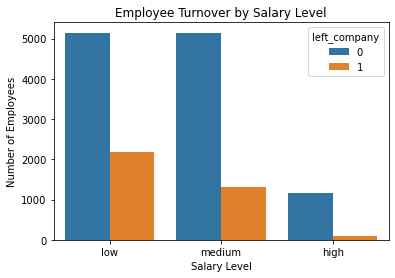

In [56]:
# Create a plot as needed
sns.countplot(x='salary', hue='left_company', data=df0)
plt.title('Employee Turnover by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()



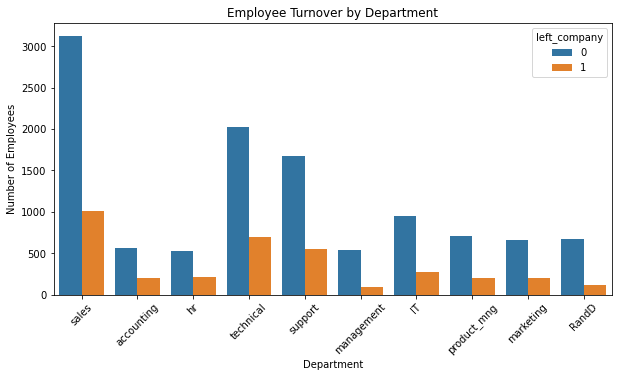

In [57]:
# Create a plot as needed
plt.figure(figsize=(10,5))
sns.countplot(x='department', hue='left_company', data=df0)
plt.title('Employee Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

